In [1]:
#importing libraries 
import os
import tensorflow as tf

c:\users\richa4992\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\richa4992\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\richa4992\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\user

In [4]:
# Directory with our training biodegradable pictures
train_bio_dir = os.path.join(r'C:\Users\richa4992\OneDrive\Trash Classifier\archive\DATASET\TRAIN\R')

# Directory with our training nonbiodegradable pictures
train_nonbio_dir = os.path.join(r'C:\Users\richa4992\OneDrive\Trash Classifier\archive\DATASET\TRAIN\O')

# Directory with our testing biodegradable pictures
validation_bio_dir = os.path.join(r'C:\Users\richa4992\OneDrive\Trash Classifier\archive\DATASET\TEST\R')

# Directory with our testing nonbiodegradable pictures
validation_nonbio_dir = os.path.join(r'C:\Users\richa4992\OneDrive\Trash Classifier\archive\DATASET\TEST\O')

In [5]:
print('total training bio images:', len(os.listdir(train_bio_dir)))
print('total training nonbio images:', len(os.listdir(train_nonbio_dir)))
print('total validation bio images:', len(os.listdir(validation_bio_dir)))
print('total validation nonbio images:', len(os.listdir(validation_nonbio_dir)))

total training bio images: 9999
total training nonbio images: 12565
total validation bio images: 1112
total validation nonbio images: 1401


In [6]:
#datapreprocessing 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
#performs dataaugmentation on the fly without saving the augmented images in the disk
train_datagen = ImageDataGenerator(rescale=1/255,horizontal_flip=True,
                         vertical_flip=True,
                         validation_split=0.1,
                         shear_range = 0.1,
                         zoom_range = 0.1,
                         width_shift_range = 0.1,
                         height_shift_range = 0.1,
                         rotation_range = 40, 
                         brightness_range = (0.5, 1.5))

validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        r'C:\Users\richa4992\OneDrive\Trash Classifier\archive\DATASET\TRAIN',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300*300
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 32 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        r'C:\Users\richa4992\OneDrive\Trash Classifier\archive\DATASET\TEST',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')


Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [7]:
labels = (train_generator.class_indices)
print(labels)

#writing labels to a file
Labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('labels.txt', 'w') as f:
  f.write(Labels)

{'O': 0, 'R': 1}


In [8]:
#defining callback function in order to stop the cnn cycle when we reach desired accuracy

def train_waste():
    class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('acc')>0.90):
                print("\nReached 90% accuracy so cancelling training!")
                self.model.stop_training = True

    callbacks = myCallback()            
#defining model
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('biodegradable') and 1 for the other ('nonbiodegradable')
    tf.keras.layers.Dense(1, activation='sigmoid')
    
    #filepath = r'trained_model.h5'

])



In [9]:
#prints the summary of model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [10]:
#compiling the model 
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [ ]:
#model fitting i.e training 
history = model.fit_generator(
    train_generator,
    steps_per_epoch=8,  
    epochs=2,
    verbose=1, 
    validation_data = validation_generator,
    validation_steps=8
      )

Epoch 1/2


Maximum Probability:  0.62232363
[1.]
 is a NON-BIODEGRADABLE


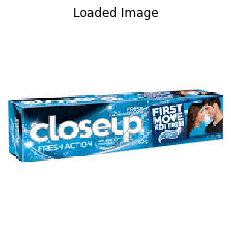

In [13]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
 
  # predicting images
path =r'C:\Users\hp\Downloads\paste.jpg' 
img = image.load_img(path, target_size=(300, 300))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

img = image.load_img(path, target_size=(300, 300))
img = image.img_to_array(img, dtype=np.uint8)
img=np.array(img)/255.0

plt.title("Loaded Image")
plt.axis('off')
plt.imshow(img.squeeze())

p=model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Maximum Probability: ",np.max(p[0], axis=-1))
images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes[0])
if classes[0]>0.5:
    print(" is a NON-BIODEGRADABLE")
else:
    print(" is a BIODEGRADABLE")